In [33]:
from scipy.stats import norm
import numpy as np
import math
import matplotlib.pyplot as plt

In [34]:
def npregress(Y, X, bandwidth, Xmidpoints=0):
    
    nrows, ncols = X.shape
    
    YX = np.concatenate((Y, X), axis=1)
    YX = YX[YX[:,1].argsort()]
    
    Y = YX[:, 0]
    X = YX[:, 1]
    
    meanX = np.mean(X)
    stdX = np.std(X)
    iota = np.ones([nrows, 1])
    
    if Xmidpoints == 0:
        nrbins = 100
        
        lowerX = X[int(np.floor(0.01 * nrows + 1))]
        upperX = X[int(np.floor(0.99 * nrows))]
        
        Xmidpoints_used = np.reshape(np.linspace(lowerX, upperX, nrbins), newshape=(nrbins, 1))
        
    else:
        nrbins, ncbins = Xmidpoints.size
        Xmidpoints_used = Xmidpoints
        
    firstb = Xmidpoints_used[0, :]
    lastb = Xmidpoints_used[nrbins - 1, :]
    binsize = ((lastb - firstb) / nrbins)
    
    if bandwidth > 0:
        bandwidth_used = bandwidth
        
    else:
        delta = 0.7764
        bandwidth_used = 1.3643 * delta * stdX * nrows ^ (- 1 / 5)
        
    
    m_regress = np.zeros(nrbins)
    
    for j in range(nrbins):
        Xb = Xmidpoints_used[j, 0]
        Z = (iota * Xb - X) / bandwidth_used
        KX = norm.pdf(Z, loc=0, scale=1)
        
        YKX = Y * X
        m_regress[j] = np.mean(YKX) / np.mean(KX)

        
    return Xmidpoints_used, m_regress, bandwidth_used

In [151]:
def npdensity(bandwidth, X, Xmidpoints = 0):
    

# % INPUTS
#     %  X          : Nx1  vector of data  (if X contains more columns only the
#     %                                      first column will be used)
#     %  Xmidpoints : nrbins x 1 columnvector of bin midpoints
#     %  bandwidth  :  if > 0 then this is the bandwidth that is used in the kernel density estimation   
#     %                if 0 or <0 , let the program determine the bandwidth based
#     %                on a plug-in estimator
# % OUTPUTS
#     % Xmidpoints_used     : the midpoints might be defined in this function if the
#     %                  input = 0
#     % k_pdf          : Density evaluated at Xmidpoints_used
#     % bandwidth_used : bandwidth used
# % local variables used
#     % firstb lastb binsize nrbins bandwidth_used Nbandwidth_used k_pdf DD 
#     % I J nr makebins mkbandwidth  meanX stdX Xb  Z KX;

    [nr,nc]  = X.shape;
    X = X[:, 0];         # take only first column of X
    meanX = np.mean(X);
    stdX  = np.std(X)
    iota = np.ones(nr); 
    X = np.sort(X);   # order the observations for column 1

  # nrbins is the number of bins/midpoints/gridpoints where the density is calculated  
    if np.all(Xmidpoints == 0):
        nrbins = 20;         # our DEFAULT number of bins (evaluation points) when it is NOT user defined
        Xmidpoints_used = np.linspace(X[math.floor(0.01*nr+1) - 1],X[math.floor(0.99*nr) - 1],nrbins);  
        # this creates an equally spaced set of X midpoints between the 1 and 99 percentile 
    else:
        #[nrbins,ncbins] = size(Xmidpoints)
        nrbins = Xmidpoints.shape[0];
        Xmidpoints_used = Xmidpoints;
    
    firstb = Xmidpoints_used[0];
    lastb  = Xmidpoints_used[nrbins-1];
    binsize = ((lastb - firstb) / nrbins);# % average binsize in this case

    if bandwidth > 0: 
        #% use the bandwidth given in the proc argument
        bandwidth_used = bandwidth;
    else: 
        #% SPECIFY THE BANDWITDTH(S)
        delta =0.7764;               #% see (9.11) and table 9.1 Cameron & Trivedi
        bandwidth_used = 1.3643 * delta * stdX * nr ** (-1/5);
        #% *(lastb-firstb)
        #% use normal
        #% use Silverman
        #% use Cross Validation
        
    k_pdf  = np.zeros(nrbins);  #%  this will contain the density estimates at the midpoints_used
    #%  bin by bin calculations since reduces the amount of workspace used vs k_pdf at each observation %

    for J in range(nrbins):        #% for each bin       %
        Xb = Xmidpoints_used[J];          #% one bin at a time  %
        Z = (iota * Xb - X) / bandwidth_used;
        KX = norm.pdf(Z, loc=0, scale=1) / bandwidth_used;     #% CHANGE if YOU WANT A DIFFERENT KERNEL  %
        k_pdf[J] = np.mean(KX);
        
    return(Xmidpoints_used, k_pdf, bandwidth_used)

def generate_data(N):
    
    X = np.random.uniform(low=0, high=30, size=(N, 1))
    u = np.random.normal(loc=0, scale=1, size=(N, 1))
    y = (np.sin(X) + 2) * X + u
    
    yX = np.concatenate((y, X), axis=1) 
    
    yX = yX[yX[:, 1].argsort()]
    
    return yX

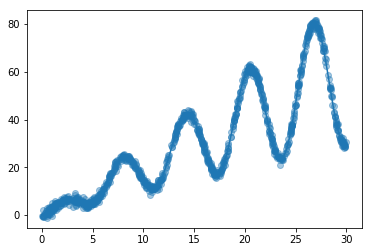

Be sure that Y is the first column and X is the second column!


C:\Users\Radim\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Radim\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


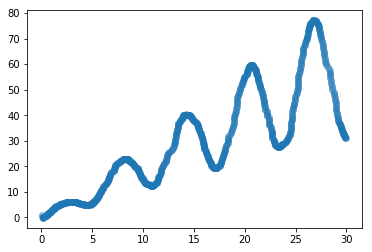

In [155]:
data = generate_data(1000)
plt.scatter(data[:, 1], data[:, 0], alpha=0.4)
plt.plot(data[:, 1], (np.sin(data[:, 1]) + 2) * data[:, 1])
plt.show()
def knn_mean (response, no, step):
    if no - step >= 0:
        knn_mean_i = np.mean(response[(no - step) : (no + step)])
        return(knn_mean_i)
    else:
        return(knn_mean(response, no, step-1))

def knn_regr (dataset, k):
    print('Be sure that Y is the first column and X is the second column!')
    N = dataset.shape[0]
    target = np.zeros(N)
    data = dataset[dataset[:, 1].argsort()]
    Y = dataset[:, 0]
    X = dataset[:, 1]
                    
    for i in range(N):
        target[i] = knn_mean(Y, i, k)
        
    return(target)
         
new_Y = knn_regr(data, 30)
plt.scatter(data[:, 1], new_Y, alpha=0.4)
plt.show()

In [130]:
def knn_mean (response, no, step):
        if no - step >= 0:
            knn_mean_i = np.mean(response[(no - step) : (no + step)])
            return(knn_mean_i)
        else:
            step_1 = step - 1
            print(step_1)
            knn_mean()
            #knn_mean (response, no, step_1)
            
knn_mean(data[:,0],4,5)

4


In [111]:
X = np.random.uniform(low=0, high=10, size=(1000, 1))
np.mean(X[(1-1):(1000-1)])

5.0541748013505599